## Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import Data and Prepare for Use

In [2]:
# import the data
housedata = pd.read_csv('NY-House-Dataset.csv')

# display first rows of csv
housedata.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

#### Drop Unusable Features (for now)

In [4]:
housedata.drop(columns = ['BROKERTITLE','ADDRESS','MAIN_ADDRESS','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS'],inplace = True)

## Make One Hot encoded

In [5]:
features_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY','SUBLOCALITY']
for x in features_to_encode:
    one_hot = pd.get_dummies(housedata[x],drop_first=True,dtype=int)
    housedata.drop(columns = x, inplace = True)
    housedata = pd.concat([housedata, one_hot], axis=1)

In [6]:
housedata.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,Coming Soon,Condo for sale,Condop for sale,Contingent,...,New York,New York County,Queens,Queens County,Rego Park,Richmond County,Riverdale,Snyder Avenue,Staten Island,The Bronx
0,315000,2,2.000000,1400.0,40.761255,-73.974483,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,195000000,7,10.000000,17545.0,40.766393,-73.980991,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,260000,4,2.000000,2015.0,40.541805,-74.196109,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,69000,3,1.000000,445.0,40.761398,-73.974613,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,55000000,7,2.373861,14175.0,40.767224,-73.969856,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Do work

In [7]:
# # housedata is already loaded and preprocessed

# class RegressionModel(nn.Module):
#     def __init__(self, input_features, h1=50, h2=50):
#         super().__init__()
#         self.fc1 = nn.Linear(input_features, h1)
#         self.fc2 = nn.Linear(h1, h2)
#         self.out = nn.Linear(h2, 1)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.out(x)
#         return x

# # Data preparation
# X = housedata.drop('PRICE', axis=1).values
# y = housedata['PRICE'].values.reshape(-1, 1)

# # Normalize the data
# scaler_X = StandardScaler()
# X = scaler_X.fit_transform(X)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Convert to PyTorch tensors
# X_train, X_val, X_test = map(torch.FloatTensor, [X_train, X_val, X_test])
# y_train, y_val, y_test = map(torch.FloatTensor, [y_train, y_val, y_test])

# # Initialize the model
# input_features = X.shape[1]
# model = RegressionModel(input_features)

# # Loss and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# # Initialize lists to store losses
# train_losses = []
# val_losses = []

# # Training loop
# epochs = 100
# for epoch in range(epochs):
#     model.train()
#     optimizer.zero_grad()
#     outputs = model(X_train)
#     train_loss = criterion(outputs, y_train)
#     train_loss.backward()
#     optimizer.step()

#     model.eval()
#     with torch.no_grad():
#         val_predictions = model(X_val)
#         val_loss = criterion(val_predictions, y_val)

#     # Store losses
#     train_losses.append(train_loss.item())
#     val_losses.append(val_loss.item())

#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss.item()}, Val Loss: {val_loss.item()}')

# # Evaluation
# with torch.no_grad():
#     predictions = model(X_test)
#     predictions = scaler_y.inverse_transform(predictions.numpy())
#     y_test_actual = scaler_y.inverse_transform(y_test.numpy())
#     mse = mean_squared_error(y_test_actual, predictions)
#     rmse = np.sqrt(mse)
#     print(f'MSE: {mse}')
#     print(f'RMSE: {rmse}')

# # Plotting the losses
# plt.figure(figsize=(10, 6))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Average RMSE: 144001168.0, Variance of RMSE: 8564944861659136.0


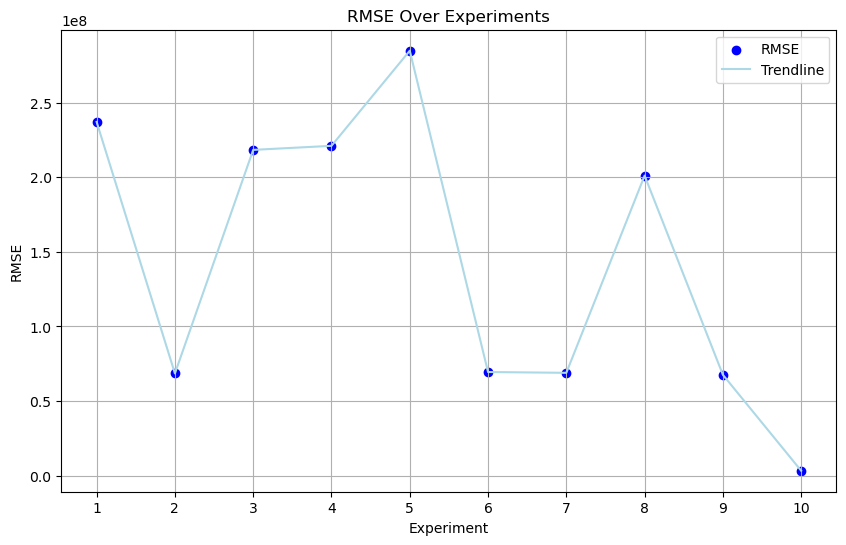

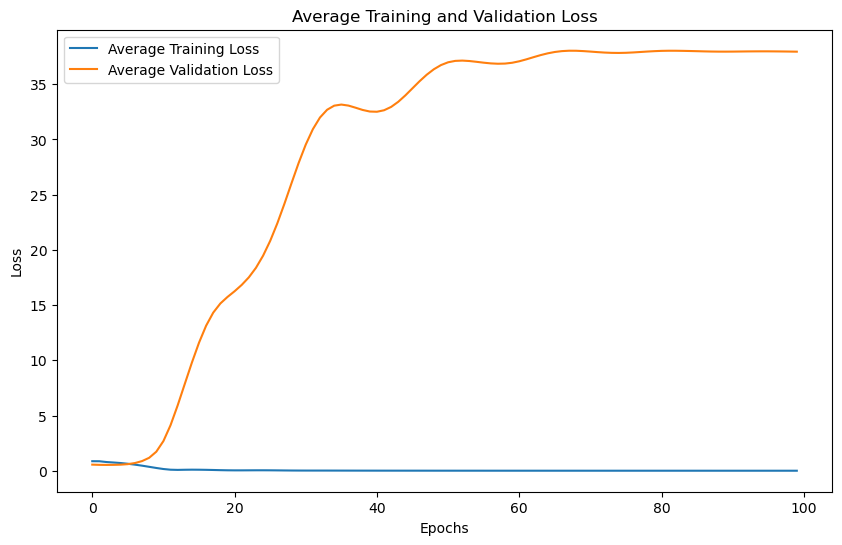

In [9]:
class RegressionModel(nn.Module):
    def __init__(self, input_features, h1=50, h2=50):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

def run_experiment(X, y, epochs=100, input_features=1):
    # Local lists to store per-experiment losses
    local_train_losses = []
    local_val_losses = []

    # 60%, 20%, 20% => training, testing, validation
    # Data preparation
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=None)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None)
    
    # Convert to PyTorch tensors
    X_train, X_val, X_test = map(torch.FloatTensor, [X_train, X_val, X_test])
    y_train, y_val, y_test = map(torch.FloatTensor, [y_train, y_val, y_test])
    
    # Initialize the model
    model = RegressionModel(input_features)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        train_loss = criterion(outputs, y_train)
        train_loss.backward()
        optimizer.step()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        # Store local losses
        local_train_losses.append(train_loss.item())
        local_val_losses.append(val_loss.item())
    
    # Evaluation
    with torch.no_grad():
        predictions = model(X_test)
        predictions = scaler_y.inverse_transform(predictions.numpy())
        y_test_actual = scaler_y.inverse_transform(y_test.numpy())
        mse = mean_squared_error(y_test_actual, predictions)
        rmse = np.sqrt(mse)
    
    return rmse, local_train_losses, local_val_losses

# Data preparation
X = housedata.drop('PRICE', axis=1).values
y = housedata['PRICE'].values.reshape(-1, 1)

# Normalize the data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Running experiments
n_experiments = 10
all_rmse = []
all_train_losses = []
all_val_losses = []

for _ in range(n_experiments):
    rmse, train_losses, val_losses = run_experiment(X_scaled, y_scaled, epochs=100, input_features=X.shape[1])
    all_rmse.append(rmse)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Calculate average and variance of RMSE
average_rmse = np.mean(all_rmse)
variance_rmse = np.var(all_rmse)

# Calculate average losses across experiments
average_train_losses = np.mean(all_train_losses, axis=0)
average_val_losses = np.mean(all_val_losses, axis=0)

# Print RMSE stats
print(f"Average RMSE: {average_rmse}, Variance of RMSE: {variance_rmse}")

# Using a scatter plot to show individual RMSE for each experiment
plt.figure(figsize=(10, 6))
plt.scatter(range(1, n_experiments + 1), all_rmse, color='blue', label='RMSE')

# Connecting the dots with a line plot for better visualization of trends
plt.plot(range(1, n_experiments + 1), all_rmse, color='lightblue', label='Trendline')

plt.title('RMSE Over Experiments')
plt.xlabel('Experiment')
plt.ylabel('RMSE')
plt.xticks(range(1, n_experiments + 1))  # Ensure ticks for each experiment
plt.legend()
plt.grid(True)
plt.show()

# Plotting the average losses
plt.figure(figsize=(10, 6))
plt.plot(average_train_losses, label='Average Training Loss')
plt.plot(average_val_losses, label='Average Validation Loss')
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()